On crée un dossier pourmettre le fichier d'authentification de kaggle :

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


On copie le fichier kaggle.json qui contient mon identifiant et mot de passe :

In [ ]:
! cp kaggle.json ~/.kaggle/

On donne les droits comme suit :

In [ ]:
! chmod 700 ~/.kaggle/kaggle.json

On récupère le datset à partir de kaggle :

In [ ]:
! kaggle datasets download xhlulu/recursion-cellular-image-classification-224-jpg

recursion-cellular-image-classification-224-jpg.zip: Skipping, found more recently modified local copy (use --force to force download)


On dézippe les données dans notre répértoire sur colab :

In [ ]:
!unzip recursion-cellular-image-classification-224-jpg.zip

On crée un nouveau dossier "/content/train_processed" qui contiendera nos données classifiés par catégorie U2OS,HUVEC,HEPG2,RPE :

In [ ]:
import os
#os.makedirs('/content/train_processed')

On crée dans /content/train_processed un répértoire pour chanque catégorie :

In [ ]:
os.makedirs('/content/train_processed/HEPG2')
os.makedirs('/content/train_processed/HUVEC')
os.makedirs('/content/train_processed/RPE')
os.makedirs('/content/train_processed/U2OS')

Nous avons dans un premier temps classifié nos données dans les 4 sous-dossiers par catégories comme suit :

In [ ]:
import pandas as pd

import shutil

In [ ]:


train_df = pd.read_csv('/content/new_train.csv')
train_df['category'] = train_df['experiment'].apply(lambda x: x.split('-')[0])
train_df
train_df = train_df.reset_index()  # make sure indexes pair with number of rows

path = "/content/train/train"


for index, row in train_df.iterrows():
    if row['category']=='HEPG2':
      dst_dir='/content/train_processed/HEPG2'
      img=path+"/"+row['filename']
      #print(img)
      shutil.copy(img, dst_dir)
    if row['category']=='HUVEC':
      dst_dir='/content/train_processed/HUVEC'
      img=path+"/"+row['filename']
      shutil.copy(img, dst_dir)
    if row['category']=='RPE':
      dst_dir='/content/train_processed/RPE'
      img=path+"/"+row['filename']
      shutil.copy(img, dst_dir)
    if row['category']=='U2OS':
      dst_dir='/content/train_processed/U2OS'
      img=path+"/"+row['filename']
      shutil.copy(img, dst_dir)

    

In [ ]:
os.listdir('/content/train_processed/HEPG2')

On affiche 4 photos de chaque sous dossir , donc 4 photos par type de cellule (ligne1:HEPG2 ,ligne2 : HUVEC ,ligne3 : RPE ,ligne4 : U2OS) comme suit:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

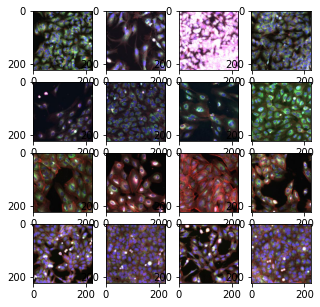

In [ ]:

import os
src_path = "/content/train_processed/"
sub_class = os.listdir(src_path)
k=0

fig = plt.figure(figsize=(5,5))
path = os.path.join(src_path,sub_class[0])
for e in os.listdir(src_path):
    path = os.path.join(src_path,e)
    for i in range(4):
         k=k+1
         x=os.listdir(path)[i]
         #print(x)
         plt.subplot(4,4,k)
         img = plt.imread(os.path.join(path,x))
         #print(os.path.join(path,x))
         plt.imshow(img, cmap=plt.get_cmap('gray'))

In [ ]:
os.makedirs('/content/test_copy')

In [ ]:
! chmod 777 /content/test_copy/ 

In [ ]:
os.listdir("/content/test/test")

In [ ]:
import glob
import shutil
import os

items=os.listdir('/content/test/test')
src_dir = "/content/test/test"


dst_dir = "/content/test_copy"

for f in items:
  print(f)
  src="/content/test/test/"+f
  shutil.copy(src, dst_dir)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import os

Par manque de ressources nous avons décidé de réduire la taille de nos données nous avons dans un premier temps prit  50% des données d'entrainement ce qui a fait 36516 photos au lieu de 73030 mais la ram sur COLAB n'a pas suffit même avec la moitié des données.
Nous avons ensuite réduit à 30% puis 10% l'execution complète n'a toujours pas pu se faire par manque de RAM.
On en est donc arrivé à réduire les données à 1% pour ne plus avoir de problème et pouvoir finir l'execution du modèle jusqu'au bout sans problème.
Nous avons classifié les photos par catégories dans 4 sous-dossiers comme suis :

In [ ]:

percent_train=0.01
src_path = "/content/train_processed"
train_data = []
train_label = []
len_HEPG2=len(os.listdir('/content/train_processed/HEPG2'))*percent_train
print(len_HEPG2)
print('*************')
len_HUVEC=len(os.listdir('/content/train_processed/HUVEC'))*percent_train
print(len_HUVEC)
len_RPE=len(os.listdir('/content/train_processed/RPE'))*percent_train
len_U2OS=len(os.listdir('/content/train_processed/U2OS'))*percent_train
i1=0
i2=0
i3=0
i4=0
for e in os.listdir(src_path):
    path = os.path.join(src_path,e)

    for x in os.listdir(path):
      
      if(i1<len_HEPG2 ) & (path=='/content/train_processed/HEPG2'):
       #print("path: "+ path)
       #print("x :"+x)
        img = cv2.imread(os.path.join(path,x))
        train_data.append(img)
        train_label.append(e)
        i1=i1+1
      if(i2<len_HUVEC)&(path=='/content/train_processed/HUVEC'):
        i2=i2+1
        #print("path: "+ path)
        #print("x :"+x)
        img = cv2.imread(os.path.join(path,x))
        train_data.append(img)
        train_label.append(e)
        
        
      if(i3<len_RPE)&(path=='/content/train_processed/RPE'):
        img = cv2.imread(os.path.join(path,x))
        train_data.append(img)
        train_label.append(e)
        i3=i3+1
      if(i4<len_U2OS)&(path=='/content/train_processed/U2OS'):
        img = cv2.imread(os.path.join(path,x))
        train_data.append(img)
        train_label.append(e)
        i4=i4+1
 

155.0
*************
353.76


On mets 1% de nos données de test pour les prédictions dans un tableau comme suit :

In [ ]:
import cv2
import os

percent_test=0.01
i5=0
len_test_copy=len(os.listdir('/content/test_copy'))*0.01
src_path = "/content/test_copy"
test_data = []
for e in os.listdir(src_path):
  if(i5<len_test_copy)&(src_path=='/content/test_copy'):
    img = cv2.imread(os.path.join(src_path,e))
    test_data.append(img)
    i5=i5+1

test_data = np.array(test_data, dtype="float") / 255.0

pas sure

In [ ]:
os.makedirs('/content/test2')
os.makedirs('/content/test2/HEPG2')
os.makedirs('/content/test2/HUVEC')
os.makedirs('/content/test2/RPE')
os.makedirs('/content/test2/U2OS')

In [ ]:
! chmod 777 /content/test/test/

In [ ]:
! chmod 777 /content/test_copy/HUVEC/

In [ ]:
test_df = pd.read_csv('/content/new_test.csv')
test_df['category'] = test_df['experiment'].apply(lambda x: x.split('-')[0])
#test_df
test_df = test_df.reset_index()  # make sure indexes pair with number of rows

path = "/content/test/test"

for index, row in test_df.iterrows():
    if row['category']=='HEPG2':
      dst_dir='/content/test2/HEPG2'
      img=path+"/"+row['filename']
      print(img)
      shutil.copy(img, dst_dir)
    if row['category']=='HUVEC':
      dst_dir='/content/test2/HUVEC'
      img=path+"/"+row['filename']
      shutil.copy(img, dst_dir)
    if row['category']=='RPE':
      dst_dir='/content/test2/RPE'
      img=path+"/"+row['filename']
      shutil.copy(img, dst_dir)
    if row['category']=='U2OS':
      dst_dir='/content/test2/U2OS'
      img=path+"/"+row['filename']
      shutil.copy(img, dst_dir)


In [ ]:
percent=0.01
src_path = "/content/test2/"
test_data = []
test_label = []
len_HEPG2=len(os.listdir('/content/test2/HEPG2'))*percent
print('*************')
len_HUVEC=len(os.listdir('/content/test2/HUVEC'))*percent
print(len_HUVEC)
len_RPE=len(os.listdir('/content/test2/RPE'))*percent
len_U2OS=len(os.listdir('/content/test2/U2OS'))*percent

i1=0
i2=0
i3=0
i4=0
for e in os.listdir(src_path):
    path = os.path.join(src_path,e)
    print(path)

    for x in os.listdir(path):
      
      if(i1<len_HEPG2 ) & (path=='/content/test2/HEPG2'):
       #print("path: "+ path)
       #print("x :"+x)
        img = cv2.imread(os.path.join(path,x))
        test_data.append(img)
        test_label.append(e)
        i1=i1+1
      if(i2<len_HUVEC)&(path=='/content/test2/HUVEC'):
        i2=i2+1
        #print("path: "+ path)
        #print("x :"+x)
        img = cv2.imread(os.path.join(path,x))
        test_data.append(img)
        test_label.append(e)
        
        
      if(i3<len_RPE)&(path=='/content/test2/RPE'):
        img = cv2.imread(os.path.join(path,x))
        test_data.append(img)
        test_label.append(e)
        i3=i3+1
      if(i4<len_U2OS)&(path=='/content/test2/U2OS'):
        img = cv2.imread(os.path.join(path,x))
        test_data.append(img)
        test_label.append(e)
        i4=i4+1



*************
176.92000000000002
/content/test2/HEPG2
/content/test2/HUVEC
/content/test2/RPE
/content/test2/U2OS


In [ ]:
train_data = np.array(train_data, dtype="float") / 255.0
le = LabelEncoder()
#print(train_label[0])
train_label = le.fit_transform(train_label)
train_label = to_categorical(train_label)
(trainX, valX, trainY, valY) = train_test_split(train_data, train_label, test_size=0.20, random_state=42)


In [ ]:
test_data = np.array(test_data, dtype="float") / 255.0
le = LabelEncoder()
#print(train_label[0])
test_label = le.fit_transform(test_label)
test_label = to_categorical(test_label)
#(testX,testY) = train_test_split(test_data, test_label)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")

test_datagen = ImageDataGenerator()

In [ ]:
batch_size = 8
train_generator = train_datagen.flow(trainX, trainY, batch_size=batch_size)
valid_generator = train_datagen.flow(trainX, trainY, batch_size=batch_size)
test_generator = test_datagen.flow(test_data, batch_size=1)

On construit un premier modèle  , il contiendera 3 couches de convolution , une couche cachées et 4 sorties :

In [ ]:
from keras.models import Sequential
def prepare_model():
    model = Sequential()
    model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(16,kernel_size=(3,3),activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))


    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [ ]:
model = prepare_model()
model.summary()
model.fit_generator(train_generator, validation_data=test_generator,steps_per_epoch=len(trainX) // batch_size, epochs=5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 16)       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
73/73 [==============================] - 24s 320ms/step - loss: 1.2503 - accuracy: 0.5269 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
73/73 [==============================] - 23s 319ms/step - loss: 0.6650 - accuracy: 0.7279 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
73/73 [==============================] - 24s 329ms/step - loss: 0.5035 - accuracy: 0.8111 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
73/73 [==============================] - 24s 332ms/step - loss: 0.4385 - accuracy: 0.8111 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
73/73 [==============================] - 24s 332ms/step - loss: 0.3596 - accuracy: 0.8475 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


Récuperation des filtres de la première couche de convolution

In [ ]:
layer1=model.layers
filters,biaises=model.layers[0].get_weights()
print(layer1[0].name,filters.shape)

conv2d_13 (3, 3, 3, 8)


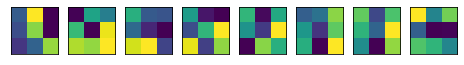

In [ ]:
fig1=plt.figure(figsize=(8,12))
columns=8
rows=1
n_filters=rows*columns
for i in range(1,n_filters + 1):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()


filtres de la 2eme couche :

In [ ]:
layer1=model.layers
filters,biaises=model.layers[3].get_weights()
print(layer1[3].name,filters.shape)

conv2d_1 (3, 3, 8, 16)


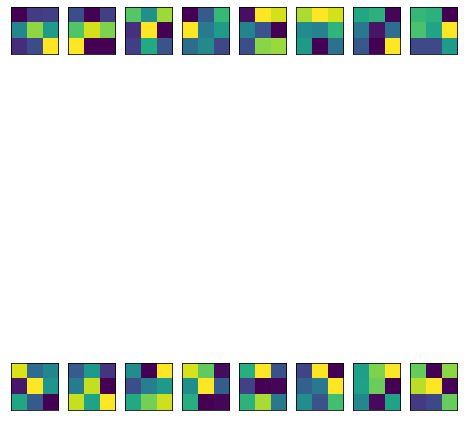

In [ ]:
fig1=plt.figure(figsize=(8,12))
columns=8
rows=2
n_filters=rows*columns
for i in range(1,n_filters + 1):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()

In [ ]:
layer1=model.layers
filters,biaises=model.layers[6].get_weights()
print(layer1[6].name,filters.shape)

conv2d_2 (3, 3, 16, 32)


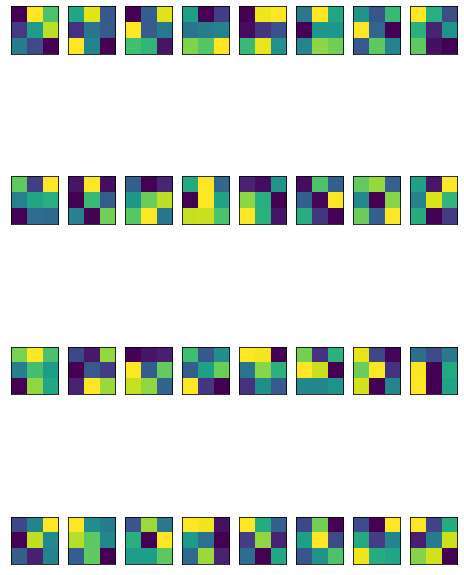

In [ ]:
fig1=plt.figure(figsize=(8,12))
columns=8
rows=4
n_filters=rows*columns
for i in range(1,n_filters + 1):
  f=filters[:,:,:,i-1]
  fig1=plt.subplot(rows,columns,i)
  fig1.set_xticks([])
  fig1.set_yticks([])
  plt.imshow(f[:,:,0])
plt.show()

In [ ]:
from keras_preprocessing.image.utils import load_img
from keras_preprocessing.image.utils import img_to_array
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot
from keras.models import Model

conv_layer_index=3
outputs=[model.layers[conv_layer_index].output]
model_short=Model(inputs=model.inputs,outputs=outputs)
#print(model_short.summary())
img = load_img('/content/train_processed/HEPG2/HEPG2-01_1_B03_s1.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
#print(img)
# get feature map for first hidden layer
feature_maps = model_short.predict(img)
print(feature_maps.shape)

columns=4
rows=2
for ftr in feature_maps:
  fig=plt.figure(figsize=(8 ,12))
  for i in range(1,columns*rows+1):
    fig1=plt.subplot(rows,columns,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(ftr[:,i-1])
  plt.show()



In [ ]:
score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss: 0.2749463617801666
Test accuracy: 0.776068389415741


In [ ]:
IMG_SIZE=224
test_data1=[]


img4=cv2.imread('/content/test_copy/U2OS-04_4_O21_s1.jpeg')
test_data1.append(img4)
test_data1 = np.array(test_data1, dtype="float") / 255.0

test_genn = test_datagen.flow(test_data1, batch_size=1)
#Calcul de la prédiction
prediction1 = model.predict(test_genn)

Bonne prédiction par ce premier modèle :

In [ ]:
prediction1

array([[0.17300141, 0.00890329, 0.10165361, 0.5663583 ]], dtype=float32)

In [ ]:
CATEGORIES = ["HEPG2", "HUVEC", "RPE","U2OS"]
pred_name = CATEGORIES[np.argmax(prediction1)]
print(pred_name)

U2OS


On construit un deuxième modèle pour voir si il sera meilleur que le premier , il contiendera 5couches de convolution , deux couches cachées et 4 sorties :

In [ ]:
from keras.models import Sequential
def prepare_model():
    model = Sequential()
    model.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(16,kernel_size=(3,3),activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,kernel_size=(3,3),activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2))) 
    model.add(Dropout(0.2))

    model.add(Conv2D(128,kernel_size=(3,3),activation='relu',))
    model.add(MaxPooling2D(pool_size=(2, 2)))#selectionner max parmi 2*2
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [ ]:
model2 = prepare_model()
model2.summary()
model2.fit_generator(train_generator, validation_data=test_generator,steps_per_epoch=len(trainX) // batch_size,
 epochs=5)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 8)       224       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 8)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 111, 111, 8)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 54, 16)       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/5
73/73 [==============================] - 26s 343ms/step - loss: 1.0038 - accuracy: 0.5945 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
73/73 [==============================] - 25s 339ms/step - loss: 0.6394 - accuracy: 0.7383 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/5
73/73 [==============================] - 25s 347ms/step - loss: 0.4420 - accuracy: 0.8146 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/5
73/73 [==============================] - 26s 357ms/step - loss: 0.4704 - accuracy: 0.8146 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/5
73/73 [==============================] - 25s 339ms/step - loss: 0.4885 - accuracy: 0.7979 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


Notre modèle est bon il donne une val_loss=0 (valeur de la fonction cout pour la cross-validation) et une valeur loss=0 (valeur de la fonction cout pour les données d'entrainements)

In [ ]:
layer=model.layers
filters = model.layers[1].get_weights()
print(filters[0])

Affichage des filtres

In [ ]:
layer2=model2.layers
filters,biaises=model2.layers[3].get_weights()
print(layer2[3].name,filters.shape)

conv2d_4 (3, 3, 8, 16)


(1, 109, 109, 16)


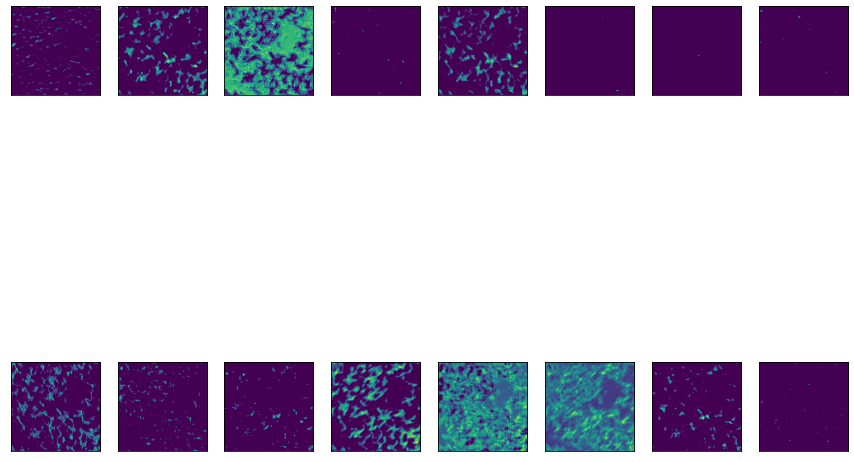

In [ ]:
conv_layer_index=3
outputs=[model2.layers[conv_layer_index].output]
model_short=Model(inputs=model2.inputs,outputs=outputs)
#print(model_short.summary())
img = load_img('/content/train_processed/HEPG2/HEPG2-01_1_B03_s1.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
#print(img)
# get feature map for first hidden layer
feature_maps = model_short.predict(img)
print(feature_maps.shape)

columns=8
rows=2
for ftr in feature_maps:
  fig=plt.figure(figsize=(15 ,12))
  for i in range(1,columns*rows+1):
    fig1=plt.subplot(rows,columns,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(ftr[:,:,i-1])
  plt.show()

In [ ]:
layer1=model2.layers
filters,biaises=model2.layers[6].get_weights()
print(layer1[6].name,filters.shape)

conv2d_5 (3, 3, 16, 32)


(1, 52, 52, 32)


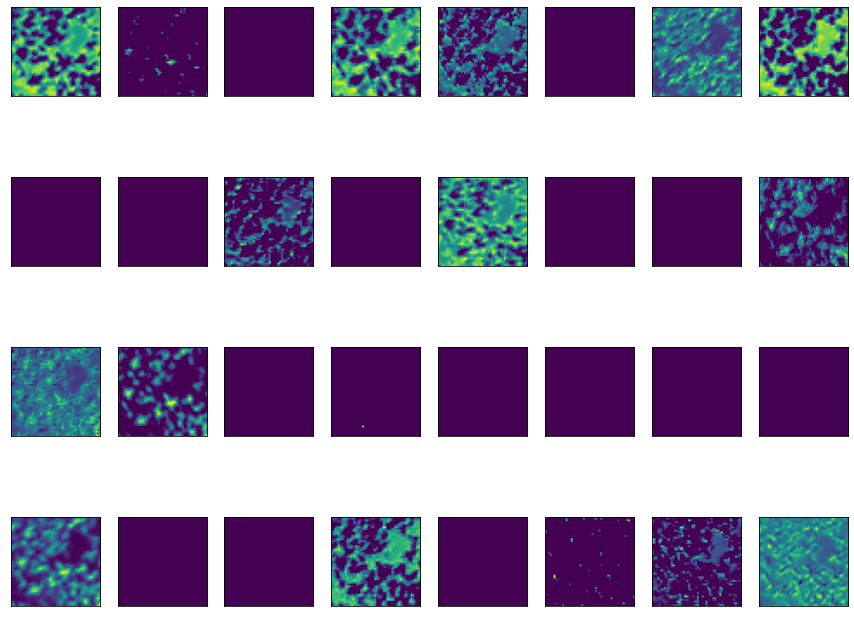

In [ ]:
conv_layer_index=6
outputs=[model2.layers[conv_layer_index].output]
model_short=Model(inputs=model2.inputs,outputs=outputs)
#print(model_short.summary())
img = load_img('/content/train_processed/HEPG2/HEPG2-01_1_B03_s1.jpeg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
#print(img)
# get feature map for first hidden layer
feature_maps = model_short.predict(img)
print(feature_maps.shape)

columns=8
rows=4
for ftr in feature_maps:
  fig=plt.figure(figsize=(15 ,12))
  for i in range(1,columns*rows+1):
    fig1=plt.subplot(rows,columns,i)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(ftr[:,:,i-1])
  plt.show()

elavluation :

In [ ]:
score = model.evaluate_generator(valid_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Test loss: 0.17895756661891937
Test accuracy: 0.8837606906890869


Notre modèle est fiable à 80% (Test accuracy: 0.8085470199584961)

In [ ]:
predict = model.predict_generator(test_generator)
# predict the class label
y_classes = predict.argmax(axis=-1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Pour vérifier que ça marche on à décider de prendre 4images du dataset de test et de les introduire une à une au model pour avoir la prédiction , les résultats obtenus sont les suivants :

In [ ]:
IMG_SIZE=224
test_data1=[]

img1=cv2.imread('/content/test_copy/HEPG2-08_1_B03_s1.jpeg')
img2=cv2.imread('/content/test_copy/HEPG2-08_1_B03_s2.jpeg')
img3=cv2.imread('/content/test_copy/HUVEC-21_1_B08_s2.jpeg')
img4=cv2.imread('/content/test_copy/U2OS-04_4_O21_s1.jpeg')

In [ ]:
IMG_SIZE=224
test_data1=[]

img1=cv2.imread('/content/test_copy/HEPG2-08_1_B03_s1.jpeg')

test_data1.append(img1)
test_data1 = np.array(test_data1, dtype="float") / 255.0

test_genn = test_datagen.flow(test_data1, batch_size=1)
#Calcul de la prédiction
prediction1 = model.predict(test_genn)



On lui a donné une image qui montre les cellules de type HEPG2 et il à prédit HEPG2 avec une probabilité de 0.46906245 , donc 46% de chance que notre image montre des celulles de type HEPG2 :

In [ ]:
prediction1

array([[0.46906245, 0.41964465, 0.17594913, 0.20019734]], dtype=float32)

In [ ]:
CATEGORIES = ["HEPG2", "HUVEC", "RPE","U2OS"]
pred_name = CATEGORIES[np.argmax(prediction1)]
print(pred_name)

HEPG2


In [ ]:
IMG_SIZE=224
test_data1=[]

img2=cv2.imread('/content/test_copy/RPE-08_4_F23_s2.jpeg')
test_data1.append(img2)
test_data1 = np.array(test_data1, dtype="float") / 255.0

test_genn = test_datagen.flow(test_data1, batch_size=1)
#Calcul de la prédiction
prediction1 = model.predict(test_genn)

On lui a donné une image qui montre les cellules de type RPE et il à prédit HUVEC -> fausse prédiction

In [ ]:
prediction1

array([[1.3112605e-01, 8.1133908e-01, 3.2517582e-02, 4.2790174e-04]],
      dtype=float32)

In [ ]:
CATEGORIES = ["HEPG2", "HUVEC", "RPE","U2OS"]
pred_name = CATEGORIES[np.argmax(prediction1)]
print(pred_name)

HUVEC


In [ ]:
IMG_SIZE=224
test_data1=[]

img3=cv2.imread('/content/test_copy/HUVEC-21_1_B08_s2.jpeg')

test_data1.append(img3)
test_data1 = np.array(test_data1, dtype="float") / 255.0

test_genn = test_datagen.flow(test_data1, batch_size=1)
#Calcul de la prédiction
prediction1 = model.predict(test_genn)

On lui a donné une image qui montre les cellules de type HUVEC et il à prédit HUVEC avec une probabilité de 7.9506207e-01 (bonne prédiction) :

In [ ]:
prediction1

array([[1.5319309e-01, 7.9506207e-01, 3.0765355e-02, 5.1742792e-04]],
      dtype=float32)

In [ ]:
CATEGORIES = ["HEPG2", "HUVEC", "RPE","U2OS"]
pred_name = CATEGORIES[np.argmax(prediction1)]
print(pred_name)

HUVEC


In [ ]:
IMG_SIZE=224
test_data1=[]


img4=cv2.imread('/content/test_copy/U2OS-04_4_O21_s1.jpeg')
test_data1.append(img4)
test_data1 = np.array(test_data1, dtype="float") / 255.0

test_genn = test_datagen.flow(test_data1, batch_size=1)
#Calcul de la prédiction
prediction1 = model.predict(test_genn)

Mauvaise prédiction on lui donne une U2OS il prédit HEPG2.

In [ ]:
prediction1

array([[0.6626052 , 0.09028134, 0.02999789, 0.27329445]], dtype=float32)

In [ ]:
CATEGORIES = ["HEPG2", "HUVEC", "RPE","U2OS"]
pred_name = CATEGORIES[np.argmax(prediction1)]
print(pred_name)

HEPG2


En conclusion notre modèle est bien construit mais avec de meilleurs ressources on peut l'améliorer en utilisant un volume plus important de données lors de la phase d'entrainement .

Tuning du modèle :

In [ ]:
print(trainY)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [ ]:
pip install -q -U keras_tuner

In [ ]:
#importing random search
from tensorflow import keras
from kerastuner import RandomSearch 

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [ ]:
def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=8, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(224,224,3)),
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=8, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
        keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(4, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
trainX

In [ ]:

#creating randomsearch object
tuner = RandomSearch(build_model,objective='val_accuracy', max_trials = 2)
# search best parameter
tuner.search(trainX,trainY,epochs=3,validation_data=(valX,valY))

Trial 2 Complete [00h 37m 31s]
val_accuracy: 0.5034013390541077

Best val_accuracy So Far: 0.795918345451355
Total elapsed time: 00h 37m 31s
INFO:tensorflow:Oracle triggered exit


In [ ]:
modelTune=tuner.get_best_models(num_models=1)[0]
#summary of best model
modelTune.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 88)      2464      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 56)      44408     
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 56)      28280     
                                                                 
 flatten (Flatten)           (None, 2661344)           0         
                                                                 
 dense (Dense)               (None, 80)                212907600 
                                                                 
 dense_1 (Dense)             (None, 4)                 324       
                                                                 
Total params: 212,983,076
Trainable params: 212,983,076


In [ ]:

model.fit(test_data,test_label,epochs=3,validation_split=0.1,initial_epoch=3)